In [3]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
import pandas as pd

In [4]:
df = pd.read_csv('summary.csv', encoding='ISO-8859-1')

# Update the 'Country' column where 'Country_Code' is 'ROC'

df.loc[df['Country_Code'] == 'ROC', 'Country'] = 'Russia'

# Verify the update
#print(df[df['Country_Code'] == 'ROC'])

# duplicate File
df2 = df.copy()

In [7]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   626 non-null    int64  
 1   Country                626 non-null    object 
 2   Total_Medals           626 non-null    int64  
 3   Gold_Medals            626 non-null    int64  
 4   Silver_Medals          626 non-null    int64  
 5   Bronze_Medals          626 non-null    int64  
 6   Total_Athletes         626 non-null    int64  
 7   Events_Count           626 non-null    int64  
 8   Host_or_Not            626 non-null    int64  
 9   Country_Code           626 non-null    object 
 10  population_total       626 non-null    int64  
 11  population_growth      626 non-null    float64
 12  GNI_per_capita         626 non-null    int64  
 13  GDP                    626 non-null    float64
 14  GDP_growth             626 non-null    float64
 15  Region

In [11]:

int64_columns = [
    'Total_Medals', 'Gold_Medals', 'Silver_Medals', 'Bronze_Medals',
    'Total_Athletes', 'Events_Count', 'Host_or_Not', 'population_total',
    'GNI_per_capita','Year'
]

df2[int64_columns] = df2[int64_columns].astype(float)

In [12]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   626 non-null    float64
 1   Country                626 non-null    object 
 2   Total_Medals           626 non-null    float64
 3   Gold_Medals            626 non-null    float64
 4   Silver_Medals          626 non-null    float64
 5   Bronze_Medals          626 non-null    float64
 6   Total_Athletes         626 non-null    float64
 7   Events_Count           626 non-null    float64
 8   Host_or_Not            626 non-null    float64
 9   Country_Code           626 non-null    object 
 10  population_total       626 non-null    float64
 11  population_growth      626 non-null    float64
 12  GNI_per_capita         626 non-null    float64
 13  GDP                    626 non-null    float64
 14  GDP_growth             626 non-null    float64
 15  Region

In [19]:
df_only_float=df2.copy()
df_only_float = df_only_float.drop(columns=['Country', 'Country_Code', 'Region','Gold_Medals','Silver_Medals','Bronze_Medals','Year'])

In [20]:
print(df_only_float.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total_Medals           626 non-null    float64
 1   Total_Athletes         626 non-null    float64
 2   Events_Count           626 non-null    float64
 3   Host_or_Not            626 non-null    float64
 4   population_total       626 non-null    float64
 5   population_growth      626 non-null    float64
 6   GNI_per_capita         626 non-null    float64
 7   GDP                    626 non-null    float64
 8   GDP_growth             626 non-null    float64
 9   GDP_per_capita         626 non-null    float64
 10  Population_Percentage  626 non-null    float64
 11  GDP_Percentage         626 non-null    float64
 12  HDI                    626 non-null    float64
dtypes: float64(13)
memory usage: 63.7 KB
None


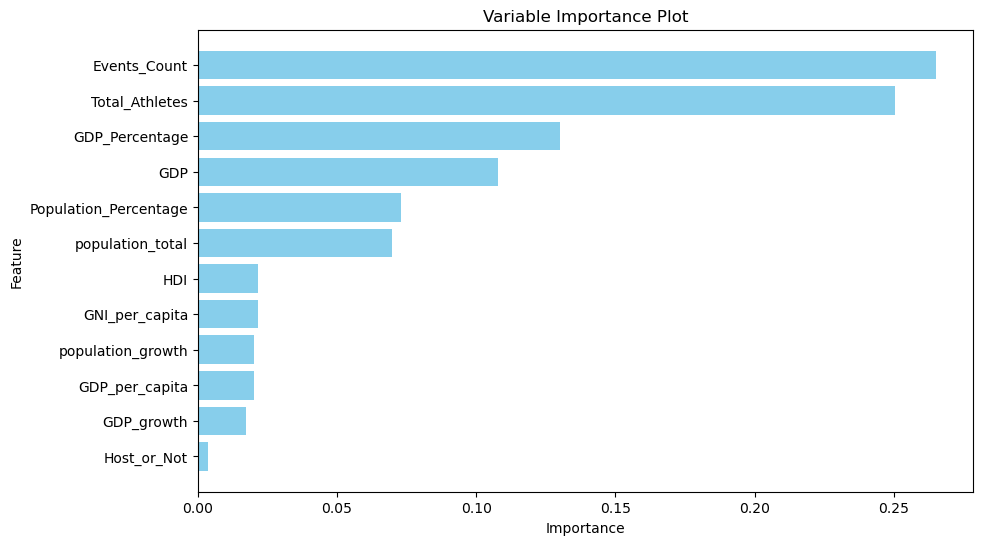

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame 'df' and the target is 'Total_Medals'
X = df_only_float.drop(columns=['Total_Medals'])  # Features
y = df_only_float['Total_Medals']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Variable Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [23]:
df_only_float_Region=df2.copy()
df_only_float_Region = df_only_float_Region.drop(columns=['Country', 'Country_Code','Gold_Medals','Silver_Medals','Bronze_Medals','Year'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


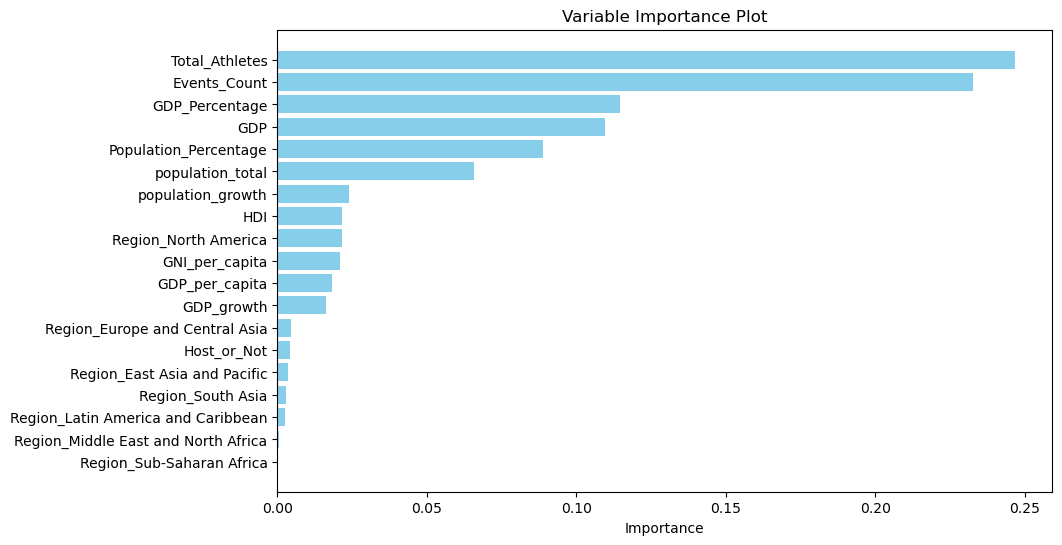

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Assuming your data is in a DataFrame 'df' and the target is 'Total_Medals'
# df['Region'] contains the categorical 'Region' column

# One-hot encode the 'Region' column
encoder = OneHotEncoder(sparse=False)  # drop='first' to avoid multicollinearity
region_encoded = pd.DataFrame(encoder.fit_transform(df[['Region']]), 
                              columns=encoder.get_feature_names_out(['Region']))

# Concatenate the encoded region back to the original dataframe, excluding 'Region' column
df_with_encoded_region = pd.concat([df_only_float_Region.drop(columns=['Region']), region_encoded], axis=1)

# Now proceed with the Random Forest model
X = df_with_encoded_region.drop(columns=['Total_Medals'])  # Features
y = df_with_encoded_region['Total_Medals']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importance = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
#plt.ylabel('Feature')
plt.title('Variable Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()
